In [1]:
from pygtrie import Trie, StringTrie

In [2]:
st = StringTrie()
st

StringTrie([], separator='/')

In [3]:
st['dog'] = 1
st['dog/cat'] = 2
st['monkey'] = 3
st

StringTrie([('dog', 1), ('dog/cat', 2), ('monkey', 3)], separator='/')

In [7]:
st.longest_prefix('dog/cat')

('dog/cat': 2)

In [8]:
st.longest_prefix('dog')

('dog': 1)

## My version

In [135]:
from copy import deepcopy

from htools import ngrams, tolist
from lolviz import *

In [81]:
class TrieNode:
    
    def __init__(self, edges=None):
        self.edges = edges or {}
        self.stop_state = False
        
    def append(self, word):
        if not word: 
            # todo: consider if this logic is right. Might be one node too 
            # late?
            self.stop_state = True
            return
        char = word[0]
        if char not in self.edges:
            self.edges[char] = TrieNode()
        self.edges[char].append(word[1:])

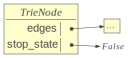

In [79]:
node = TrieNode()
objviz(node)

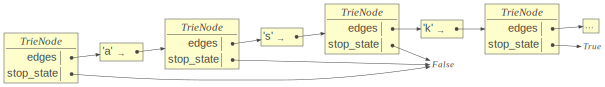

In [80]:
node.append('ask')
objviz(node)

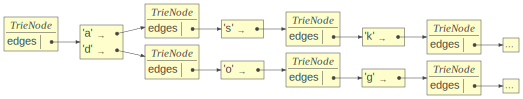

In [60]:
node.append('dog')
objviz(node)

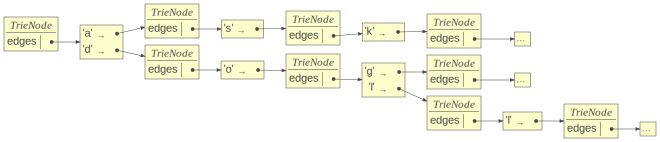

In [61]:
node.append('doll')
objviz(node)

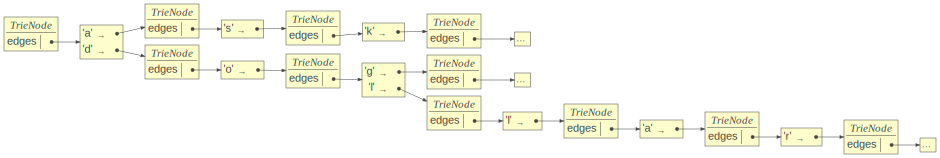

In [62]:
node.append('dollar')
objviz(node)

In [159]:
class Trie:
    
    def __init__(self, data=()):
        self.head = TrieNode()
        for item in tolist(data):
            self.append(item)
        
    def append(self, word):
        self.head.append(word)
        
    def __add__(self, word):
        clone = deepcopy(self)
        clone.append(word)
        return clone
    
    def __contains__(self, word):
        node = self.head
        for i, char in enumerate(word):
            if char not in node.edges: return False
            node = node.edges[char]
        if node.stop_state: return True

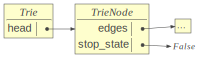

In [160]:
t = Trie()
objviz(t)

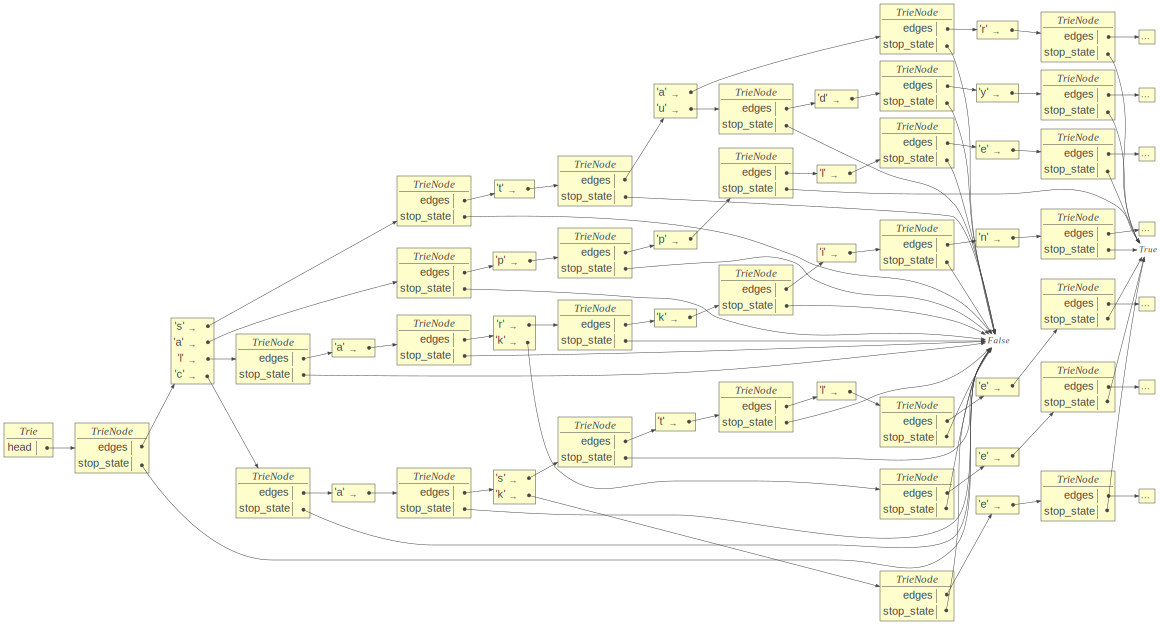

In [109]:
t.append('star')
t.append('study')
t.append('apple')
t.append('larkin')
t.append('app')
t.append('castle')
t.append('lake')
t.append('cake')

objviz(t)

In [110]:
'app' in t

{'s': <__main__.TrieNode object at 0x10a449ba8>, 'a': <__main__.TrieNode object at 0x10a449ef0>, 'l': <__main__.TrieNode object at 0x10a449cf8>, 'c': <__main__.TrieNode object at 0x10a449208>}
{'p': <__main__.TrieNode object at 0x10a4494e0>}
{'p': <__main__.TrieNode object at 0x10a449d68>}


True

In [111]:
'apple' in t

{'s': <__main__.TrieNode object at 0x10a449ba8>, 'a': <__main__.TrieNode object at 0x10a449ef0>, 'l': <__main__.TrieNode object at 0x10a449cf8>, 'c': <__main__.TrieNode object at 0x10a449208>}
{'p': <__main__.TrieNode object at 0x10a4494e0>}
{'p': <__main__.TrieNode object at 0x10a449d68>}
{'l': <__main__.TrieNode object at 0x10a449630>}
{'e': <__main__.TrieNode object at 0x10a4616d8>}


True

In [112]:
'ap' in t

{'s': <__main__.TrieNode object at 0x10a449ba8>, 'a': <__main__.TrieNode object at 0x10a449ef0>, 'l': <__main__.TrieNode object at 0x10a449cf8>, 'c': <__main__.TrieNode object at 0x10a449208>}
{'p': <__main__.TrieNode object at 0x10a4494e0>}


False

In [113]:
'appleton' in t

{'s': <__main__.TrieNode object at 0x10a449ba8>, 'a': <__main__.TrieNode object at 0x10a449ef0>, 'l': <__main__.TrieNode object at 0x10a449cf8>, 'c': <__main__.TrieNode object at 0x10a449208>}
{'p': <__main__.TrieNode object at 0x10a4494e0>}
{'p': <__main__.TrieNode object at 0x10a449d68>}
{'l': <__main__.TrieNode object at 0x10a449630>}
{'e': <__main__.TrieNode object at 0x10a4616d8>}
{}


False

In [114]:
'fox' in t

{'s': <__main__.TrieNode object at 0x10a449ba8>, 'a': <__main__.TrieNode object at 0x10a449ef0>, 'l': <__main__.TrieNode object at 0x10a449cf8>, 'c': <__main__.TrieNode object at 0x10a449208>}


False

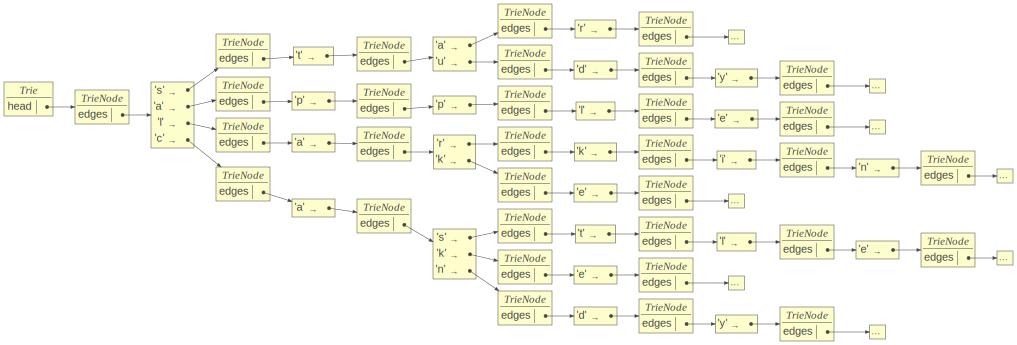

In [74]:
tmp = t + 'candy'
objviz(tmp)

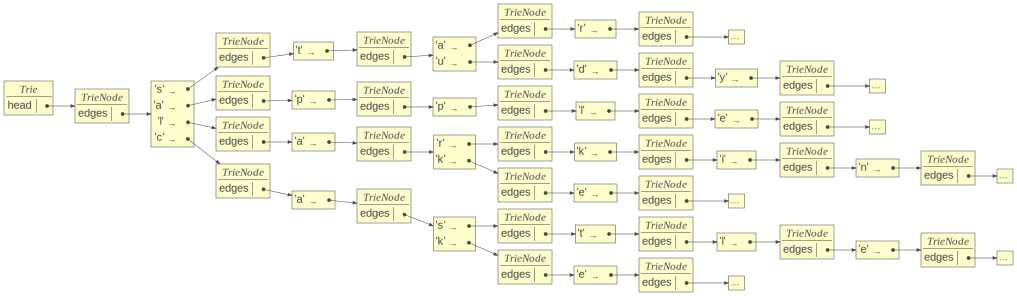

In [75]:
objviz(t)

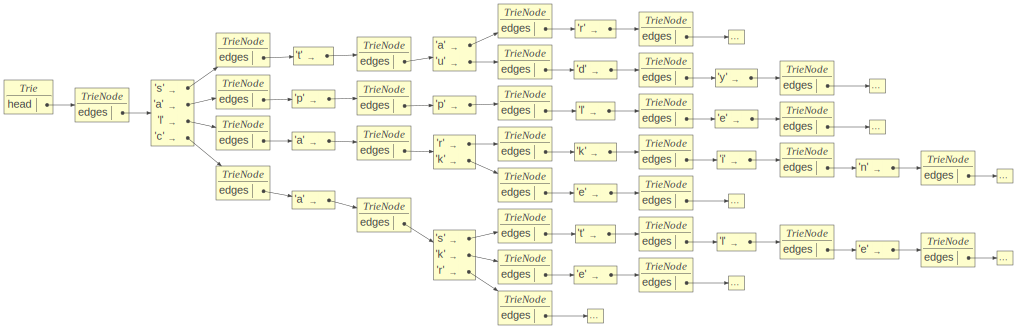

In [77]:
t += 'car'
objviz(t)

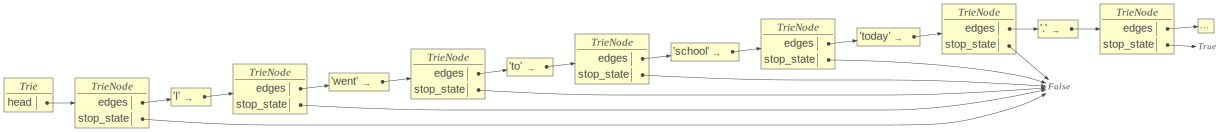

In [117]:
t2 = Trie()
t2.append(['I',  'went', 'to', 'school', 'today', '.'])
objviz(t2)

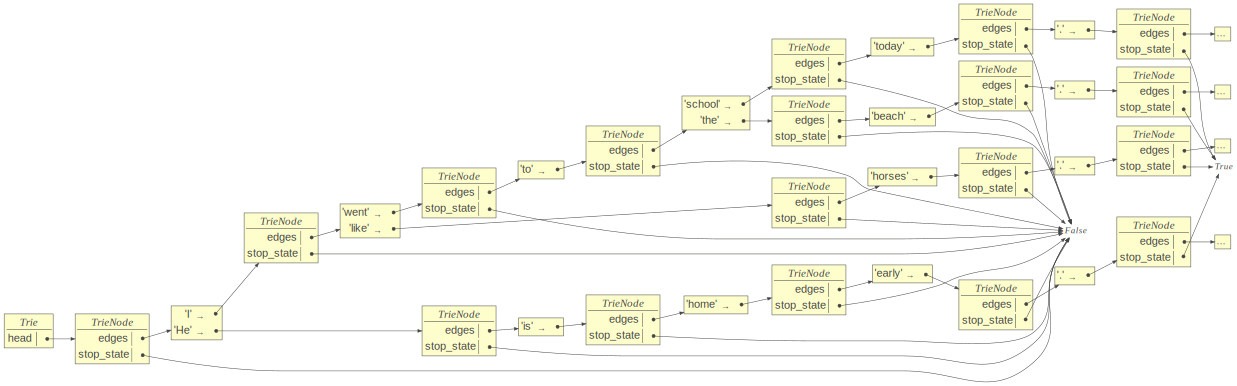

In [118]:
t2.append(['I',  'like', 'horses', '.'])
t2.append(['He', 'is', 'home', 'early', '.'])
t2.append(['I', 'went', 'to', 'the', 'beach', '.'])
objviz(t2)

In [133]:
ex = [
    'It is cold and windy.',
    'The food was still hot.',
    'It is not warm.',
    'The cow mooed loudly.',
    'It is cold and snowy.'
]

t3 = Trie()
for e in ex:
    t3.append(
        list(map(tuple, ngrams(e.split(), 2, 2, False)))
    )

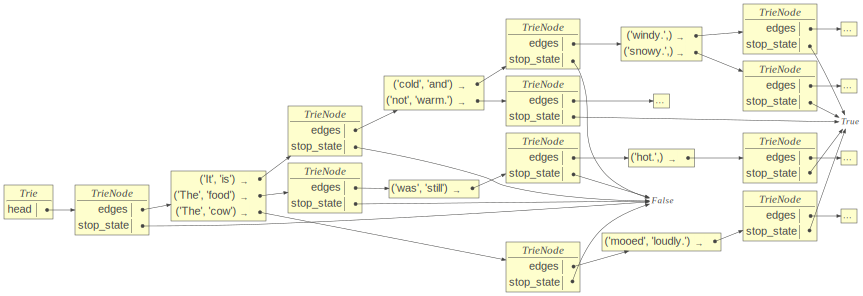

In [134]:
objviz(t3)

<class 'str'>


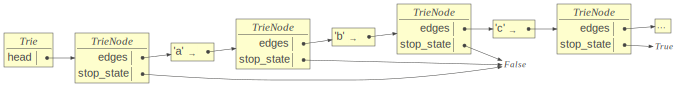

In [157]:
t4 = Trie('abc')
objviz(t4)

<class 'list'>


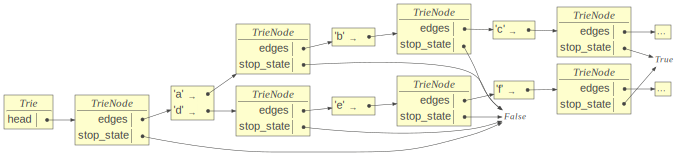

In [158]:
t5 = Trie(['abc', 'def'])
objviz(t5)